In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Attention Head Patching

In [2]:
def top_k_indices_argsort(heatmap, k):
    # Flatten the array and get the sorted indices
    flat_indices = np.argsort(heatmap, axis=None)[::-1]
    # Get the top k indices in the flattened array
    top_k_flat_indices = flat_indices[:k]
    # Convert flat indices to 2D indices
    top_k_indices = np.unravel_index(top_k_flat_indices, heatmap.shape)
    # Get the top k values
    top_k_values = heatmap[top_k_indices]
    # Zip the indices and values together
    top_k = list(zip(zip(*top_k_indices), top_k_values))
    return top_k

### Sequence Patching - LD with absolute values

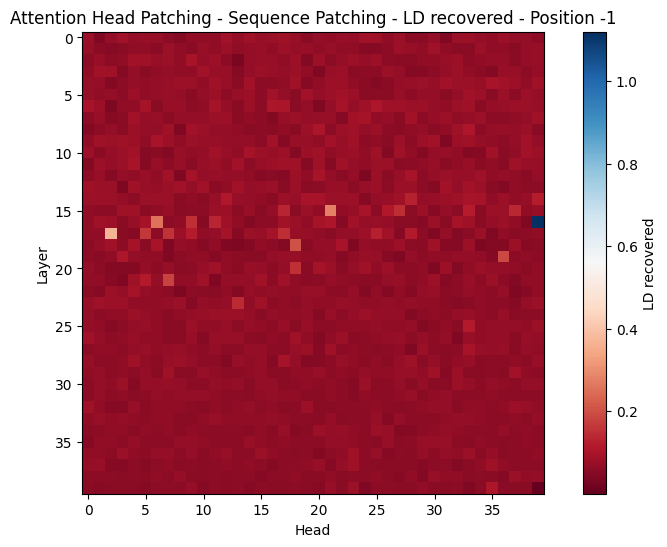

In [5]:
heatmap = torch.load("z_patching_results_unbatched_-1.pt")
heatmap = np.array(heatmap).mean(axis=0)
plt.figure(figsize=(10, 6))
plt.title("Attention Head Patching - Sequence Patching - LD recovered - Position -1")
plt.xlabel("Head")
plt.ylabel("Layer")

plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar(label="LD recovered")

plt.show()

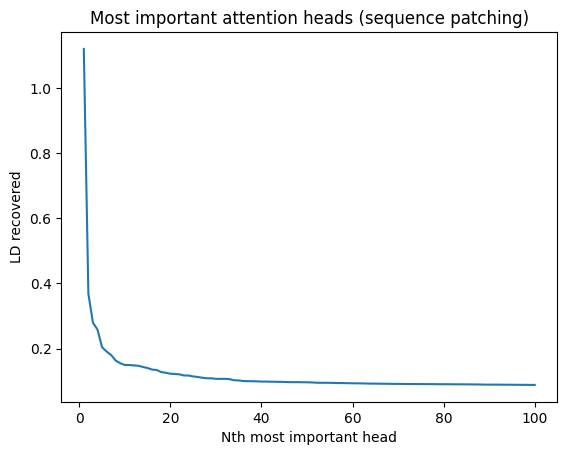

In [6]:
seq_heatmap = torch.load("z_patching_results_unbatched_-1.pt")
seq_heatmap = np.array(seq_heatmap).mean(axis=0)

seq_important_attn_heads = top_k_indices_argsort(seq_heatmap, 100)
seq_important_attn_heads_contributions = [x[1] for x in seq_important_attn_heads]

x = range(1, len(seq_important_attn_heads_contributions) + 1)
y = seq_important_attn_heads_contributions

plt.plot(x, y)
plt.xlabel("Nth most important head")
plt.ylabel("LD recovered")
plt.title("Most important attention heads (sequence patching)")

plt.show()

### Sequence Patching - LD without absolute values

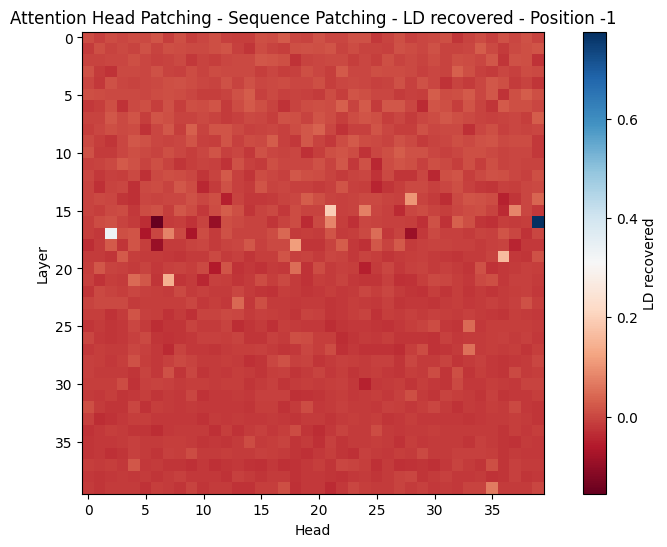

In [7]:
heatmap = torch.load("z_patching_results_unbatched_-1_alt.pt")
heatmap = np.array(heatmap).mean(axis=0)
plt.figure(figsize=(10, 6))
plt.title("Attention Head Patching - Sequence Patching - LD recovered - Position -1")
plt.xlabel("Head")
plt.ylabel("Layer")

plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar(label="LD recovered")

plt.show()

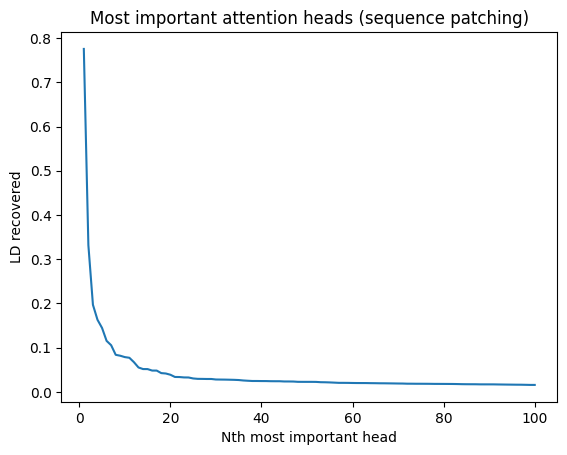

In [8]:
seq_heatmap = torch.load("z_patching_results_unbatched_-1_alt.pt")
seq_heatmap = np.array(seq_heatmap).mean(axis=0)

seq_important_attn_heads = top_k_indices_argsort(seq_heatmap, 100)
seq_important_attn_heads_contributions = [x[1] for x in seq_important_attn_heads]

x = range(1, len(seq_important_attn_heads_contributions) + 1)
y = seq_important_attn_heads_contributions

plt.plot(x, y)
plt.xlabel("Nth most important head")
plt.ylabel("LD recovered")
plt.title("Most important attention heads (sequence patching)")

plt.show()

### Persona Patching - LD recovered with absolute value

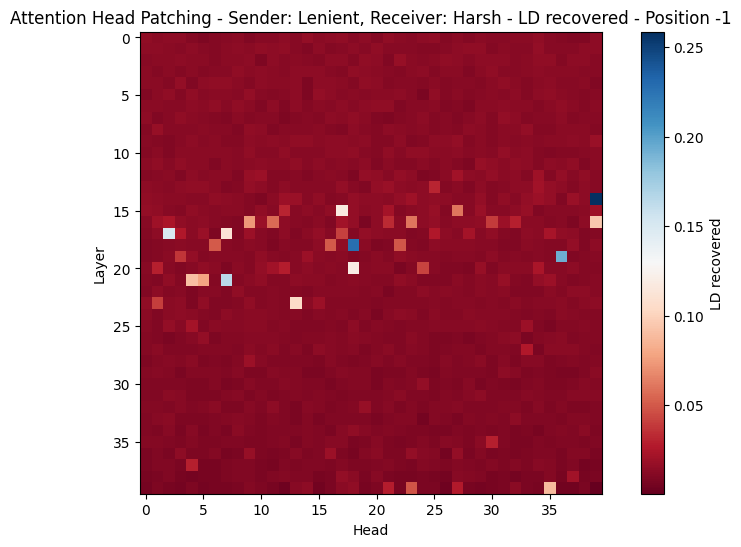

In [27]:
heatmap = torch.load("z_patching_results_unbatched_harsh_to_lenient_-1.pt")
heatmap = np.array(heatmap).mean(axis=0)
plt.figure(figsize=(10, 6))
plt.title("Attention Head Patching - Sender: Lenient, Receiver: Harsh - LD recovered - Position -1")
plt.xlabel("Head")
plt.ylabel("Layer")

plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar(label="LD recovered")

plt.show()

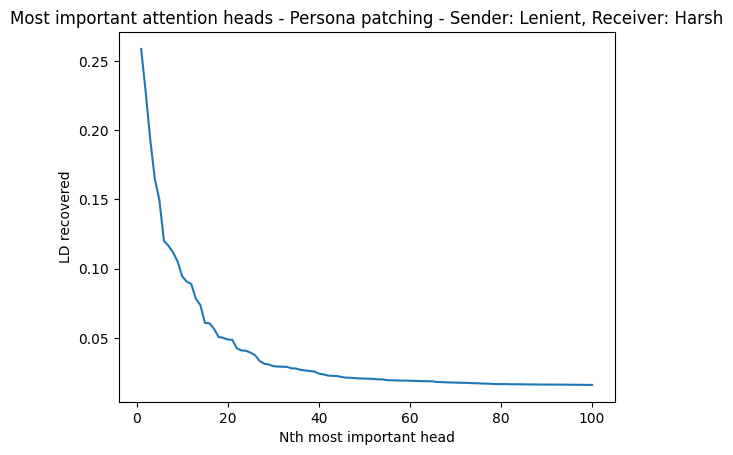

In [11]:
harsh_to_lenient_heatmap = torch.load("z_patching_results_unbatched_harsh_to_lenient_-1.pt")
harsh_to_lenient_heatmap = np.array(harsh_to_lenient_heatmap).mean(axis=0)

harsh_to_lenient_important_attn_heads = top_k_indices_argsort(harsh_to_lenient_heatmap, 100)
harsh_to_lenient_important_attn_heads_contributions = [x[1] for x in harsh_to_lenient_important_attn_heads]

x = range(1, len(harsh_to_lenient_important_attn_heads_contributions) + 1)
y = harsh_to_lenient_important_attn_heads_contributions

plt.plot(x, y)
plt.xlabel("Nth most important head")
plt.ylabel("LD recovered")
plt.title("Most important attention heads - Persona patching - Sender: Lenient, Receiver: Harsh")

plt.show()

In [18]:
max([max(x) for x in heatmap])

0.3401953125

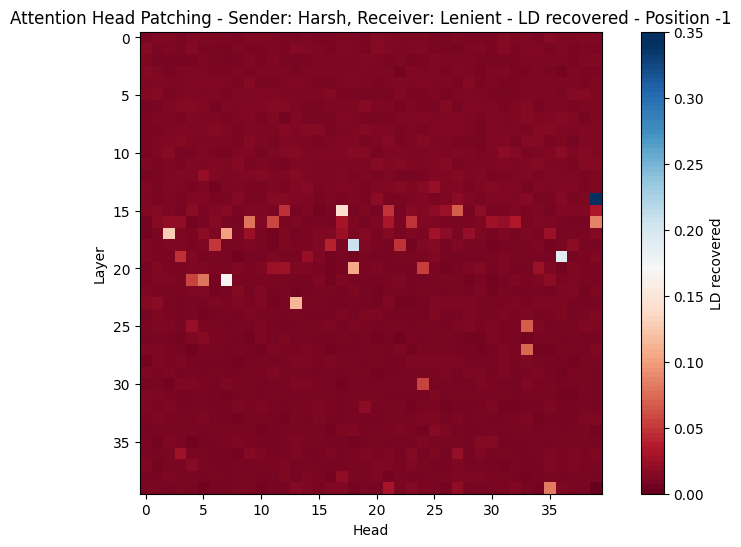

In [24]:
heatmap = torch.load("z_patching_results_unbatched_lenient_to_harsh_-1.pt")
heatmap = np.array(heatmap).mean(axis=0)
plt.figure(figsize=(10, 6))
plt.title("Attention Head Patching - Sender: Harsh, Receiver: Lenient - LD recovered - Position -1")
plt.xlabel("Head")
plt.ylabel("Layer")

plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar(label="LD recovered", boundaries=np.linspace(0.0, 0.35, 100), ticks=np.arange(0, 0.36, 0.05))

plt.show()

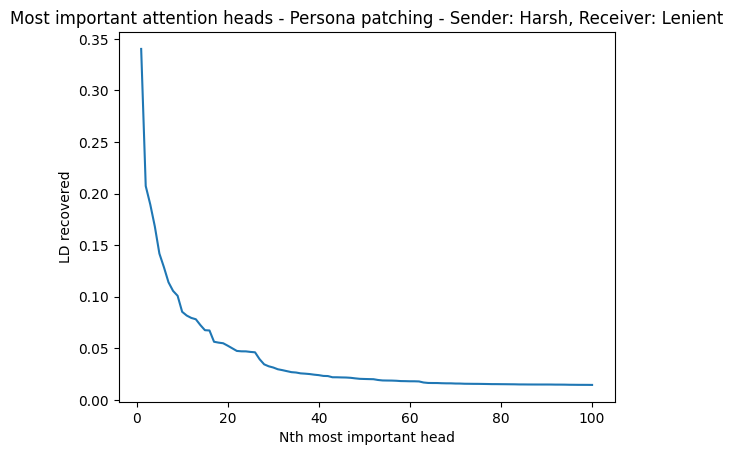

In [13]:
harsh_to_lenient_heatmap = torch.load("z_patching_results_unbatched_lenient_to_harsh_-1.pt")
harsh_to_lenient_heatmap = np.array(harsh_to_lenient_heatmap).mean(axis=0)

harsh_to_lenient_important_attn_heads = top_k_indices_argsort(harsh_to_lenient_heatmap, 100)
harsh_to_lenient_important_attn_heads_contributions = [x[1] for x in harsh_to_lenient_important_attn_heads]

x = range(1, len(harsh_to_lenient_important_attn_heads_contributions) + 1)
y = harsh_to_lenient_important_attn_heads_contributions

plt.plot(x, y)
plt.xlabel("Nth most important head")
plt.ylabel("LD recovered")
plt.title("Most important attention heads - Persona patching - Sender: Harsh, Receiver: Lenient")

plt.show()

# DAS Results

In [46]:
results1 = torch.load("das_results/das-experiment_seq-False_persona-True_Mar07-0746-50/results.pt")
results2 = torch.load("das_results/das-experiment_seq-False_persona-True_Mar07-2359-34/results.pt")

results = {}

for l in range(10, 25):
    if l < 20:
        results[l] = results1[l]
    else:
        results[l] = results2[l]

In [47]:
def plot_loss_heatmap(
        results,
        loss_key='test_seq_loss',
        layer_range=None,
        y_label='Layer',
        x_label='Token',
        title='Test Sequence Loss Heatmap',
        cmap='viridis',
        x_ticks = None,
    ):
    layer_range = layer_range or range(max(results.keys()), min(results.keys()) - 1, -1)
    
    # Assuming the inner keys are the same for all main keys and sorted
    inner_keys = sorted(list(results[10].keys()))

    x_ticks = x_ticks or inner_keys
    
    # Preparing data
    heatmap_data = []
    for l in layer_range:  # Assuming you have data for all i from 10 to 19
        row_data = [results[l][k][loss_key] for k in inner_keys]
        heatmap_data.append(row_data)

    # Converting to a numpy array for plotting
    heatmap_data = np.array(heatmap_data)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data, cmap=cmap, aspect='auto')
    plt.colorbar()

    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Setting the y-axis labels to show the correct i values
    plt.yticks(range(len(heatmap_data)), layer_range)

    # Adjust if you have more or different inner key values
    plt.xticks(range(len(inner_keys)), x_ticks)

    plt.title(title)
    plt.show()

### Toxicity

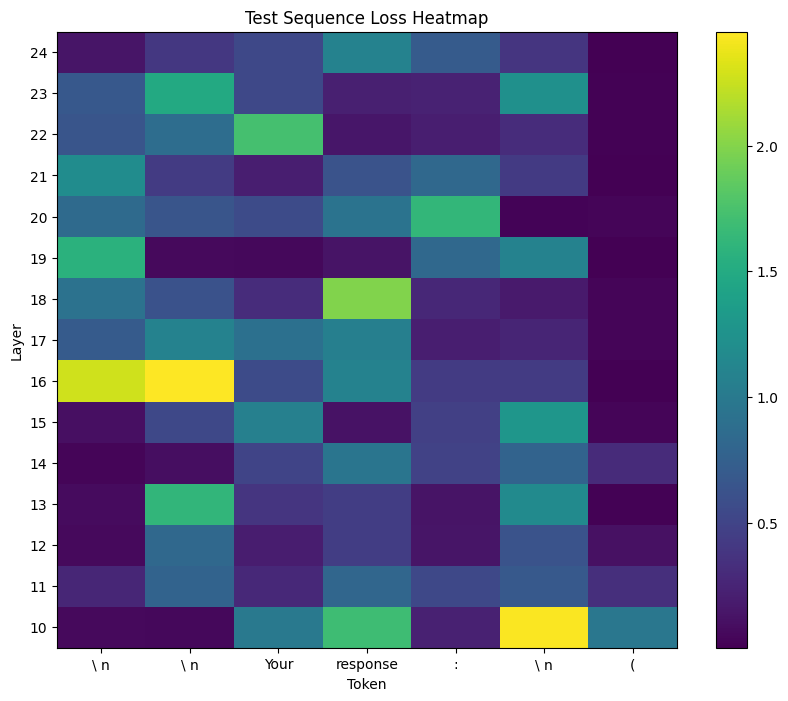

In [53]:
last_seven_tokens = ["\ n", "\ n", "Your", "response", ":", "\ n", "("]
plot_loss_heatmap(results, x_ticks=last_seven_tokens)

### Persona

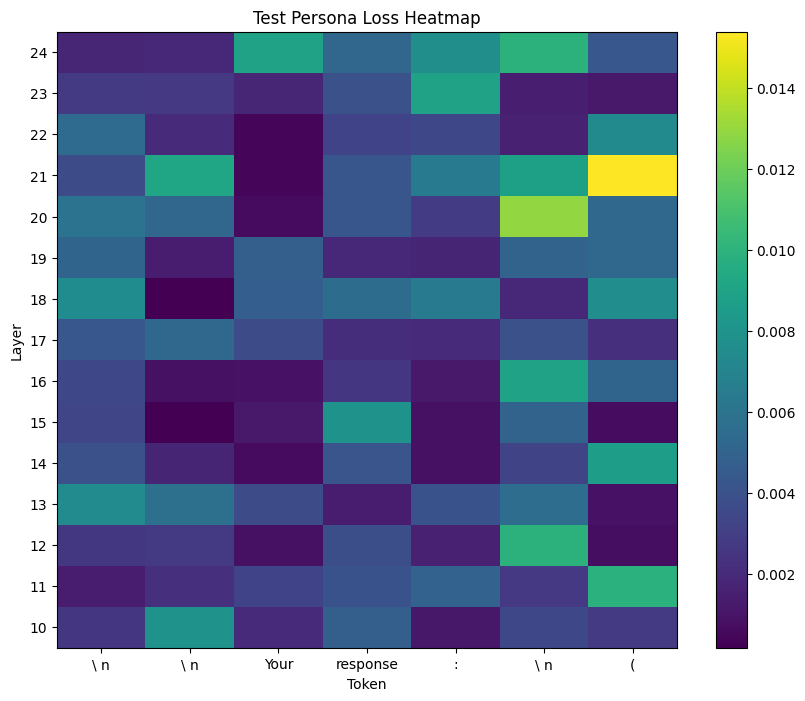

In [56]:
last_seven_tokens = ["\ n", "\ n", "Your", "response", ":", "\ n", "("]
plot_loss_heatmap(results, loss_key='test_persona_loss', title='Test Persona Loss Heatmap', x_ticks=last_seven_tokens)